In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
from google.colab import drive
drive.mount('/content/drive')
!cp drive/My Drive/Colab Notebooks/X_RAY.ipynb ./
!jupyter nbconvert --to PDF "X_RAY.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!jupyter nbconvert --to PDF "X_RAY.ipynb"

[NbConvertApp] WARNING | pattern 'X_RAY.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execu

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zehro0","key":"ed91595cb7772582485985c9cb6214fd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:27<00:00, 105MB/s] 
100% 2.29G/2.29G [00:27<00:00, 90.7MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
vgg_base = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg_base.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)


In [ ]:
history = model.fit(train_generator, steps_per_epoch = train_generator.samples // train_generator.batch_size,
                  epochs=5,
                  validation_data=val_generator,
                  validation_steps=val_generator.samples // val_generator.batch_size,
                  callbacks=[early_stopping, model_checkpoint])

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.8610 - loss: 0.3322 
Epoch 1: val_loss improved from inf to 0.30794, saving model to best_model.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 3392s 21s/step - accuracy: 0.8613 - loss: 0.3315 - val_accuracy: 0.7500 - val_loss: 0.3079
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 0.30794
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3079
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.9538 - loss: 0.1251 
Epoch 3: val_loss improved from 0.30794 to 0.29297, saving model to best_model.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 3377s 20s/step - accuracy: 0.9537 - loss: 0.1252 - val_accuracy: 0.7500 - val_loss: 0.2930
Epoch 4/5

Epoch 4: val_loss did not improve from 0.29297
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.2930
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.9535 - loss: 0.1167 
Epoch 5: val_loss improved from 0.29297 to 0.27122, saving model to best_model.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 3321s 20s/step - accuracy: 0.9535 - loss: 0.1168 - val_accuracy: 0.8750 - val_loss: 0.2712


In [ ]:
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
    print("History saved to history.pkl")
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)
    print("History loaded from history.pkl")

History saved to history.pkl
History loaded from history.pkl


In [ ]:
model.load_weights('best_model.keras')
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)


20/20 ━━━━━━━━━━━━━━━━━━━━ 401s 20s/step - accuracy: 0.8936 - loss: 0.2999


In [ ]:
print('Test accuracy:' + str(test_acc * 100) + "%")

Test accuracy:91.50640964508057%


In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, steps = test_generator.samples // test_generator.batch_size + 1)
predicted_cLasses = np.where(predictions > 0.5, 1, 0)
print(predicted_cLasses[:10])

20/20 ━━━━━━━━━━━━━━━━━━━━ 398s 20s/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
predicted_cLasses

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
true_classes = test_generator.classes
# Use predicted_cLasses which was defined previously
conf_matrix = confusion_matrix(true_classes, predicted_cLasses)
print('Confusion Matrix:')
print(conf_matrix)

class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_cLasses, target_names=class_labels)
print('Classification Report:')
print(report)

Confusion Matrix:
[[199  35]
 [ 18 372]]
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.92      0.85      0.88       234
   PNEUMONIA       0.91      0.95      0.93       390

    accuracy                           0.92       624
   macro avg       0.92      0.90      0.91       624
weighted avg       0.92      0.92      0.91       624



Confusion Matrix:
[[199  35]
 [ 18 372]]


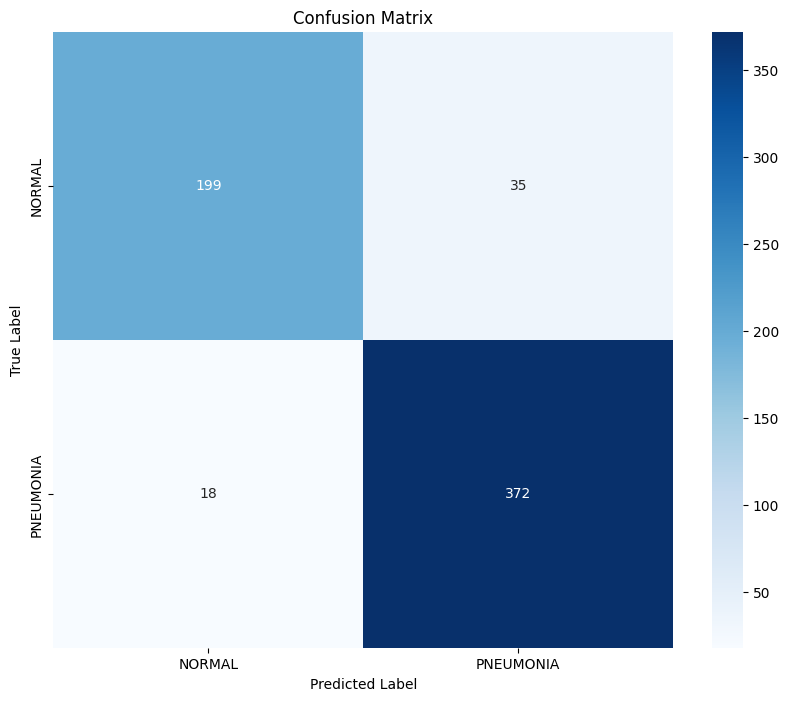

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.92      0.85      0.88       234
   PNEUMONIA       0.91      0.95      0.93       390

    accuracy                           0.92       624
   macro avg       0.92      0.90      0.91       624
weighted avg       0.92      0.92      0.91       624



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

true_classes = test_generator.classes
conf_matrix = confusion_matrix(true_classes, predicted_cLasses)
print('Confusion Matrix:')
print(conf_matrix)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_cLasses, target_names=class_labels)
print('Classification Report:')
print(report)

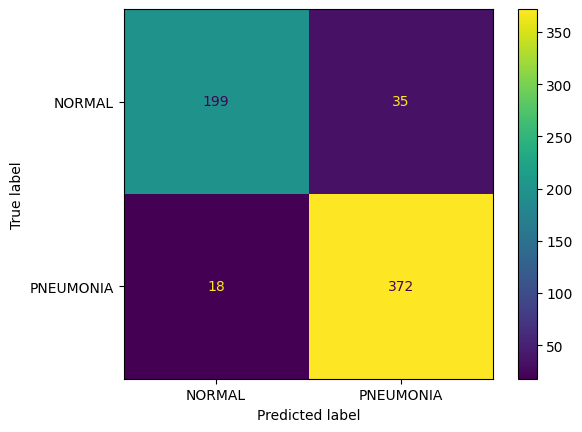

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import the ConfusionMatrixDisplay class
true_classes = test_generator.classes
conf_matrix = confusion_matrix(true_classes, predicted_cLasses)
ConfusionMatrixDisplay(conf_matrix, display_labels=test_generator.class_indices.keys()).plot()